<a href="https://colab.research.google.com/github/arshadaafaq/Task-1-Prediction-using-Supervised-Machine-Learning/blob/main/_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Lets first understand the data before manipulation of the data. In order to understand the problem and then approach the problem,follwing schema is important which is listed below :-
# 1) Extracting the Data
# 2) Framework of data
# 3) Cleaning the data
# 4) Understanding the columns and rows
## 5) EDA and Visulaizations


# **1) Extracting the Data**

In [50]:
#importing the libraries 
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Defining the path of the file
main_df = pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [4]:
#read the csv file
main_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 2)  **Framework**

In [5]:
# to know the shape of the dataset
main_df.shape

(119390, 32)

In [6]:
main_df.head()   #Taking a look of the data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


We have 5 rows and 32 columns, now lets see columns name.

In [7]:
#checking tail
main_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#to know the columns name
main_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
#checking null values 
main_df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [11]:
#checking random 7 rows 
main_df.sample(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
62350,City Hotel,1,15,2017,January,2,10,0,3,2,...,No Deposit,9.0,NaN,0,Transient,79.50,0,0,Canceled,2016-12-27
27503,Resort Hotel,0,32,2016,August,36,28,2,1,2,...,No Deposit,240.0,NaN,0,Transient,216.00,0,2,Check-Out,2016-08-31
68830,City Hotel,1,97,2017,May,21,21,2,1,3,...,No Deposit,9.0,NaN,0,Transient,180.00,0,0,Canceled,2017-04-05
9454,Resort Hotel,1,16,2016,December,49,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient,60.00,0,2,Canceled,2016-11-15
41950,City Hotel,1,0,2015,August,35,27,2,6,2,...,No Deposit,NaN,NaN,0,Transient,62.80,0,0,Canceled,2015-08-27
74572,City Hotel,1,346,2015,September,40,28,1,1,2,...,Non Refund,1.0,NaN,0,Contract,62.00,0,0,Canceled,2015-01-01
5701,Resort Hotel,1,59,2016,May,20,11,0,3,2,...,No Deposit,241.0,NaN,0,Transient,73.15,0,0,Canceled,2016-04-11


In [12]:
main_df.shape


(119390, 32)

**FINDINGS FROM HOTEL BOOKING DATA SET**


##################

In [13]:
# Determining duplicate values in our Hotel Booking dataset
print(main_df[main_df.duplicated()].shape)
print(main_df.duplicated().sum())

(31994, 32)
31994


##Problem statement

#######

**DATA CLEANING FOR HOTEL BOOKING**

###########

In [14]:
#Creating a copy of dataset
df_hotel = main_df.copy()

In [15]:
#Dropping the duplicate values from hotel booking dataset
df_hotel = df_hotel.drop_duplicates()

In [16]:
#Recheking the shape of our hotel booking dataset after dropping all the duplicates
df_hotel.shape

(87396, 32)

In [17]:
#Recheking our hotel booking dataset wheater they have any more duplicate values.
df_hotel.duplicated().sum()

0

**Now Duplicated data has been removed from hotel booking dataset, but we still have missing values. Let's deal with them**

In [18]:
df_hotel.sample(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
73631,City Hotel,1,33,2017,August,35,28,1,3,3,...,No Deposit,9.0,NaN,0,Transient,210.00,0,0,Canceled,2017-07-31
113427,City Hotel,0,24,2017,May,22,31,2,5,1,...,No Deposit,9.0,NaN,0,Transient,76.29,0,0,Check-Out,2017-06-07
83165,City Hotel,1,11,2016,January,4,22,0,0,2,...,No Deposit,9.0,NaN,0,Transient,0.00,0,1,No-Show,2016-01-22
108237,City Hotel,0,35,2017,March,12,19,2,4,2,...,No Deposit,7.0,NaN,0,Transient,91.82,0,1,Check-Out,2017-03-25


In [19]:
# Defining the function 
def null_detail(df):
  hotel_df= pd.DataFrame(index= df.columns, columns=["datatype","null_values", "total_values", "unique_count", "non_null_values" ,"%null_values"])
  hotel_df["datatype"]= [type(i) for i in list(df.columns)]
  hotel_df["null_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  hotel_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  hotel_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  hotel_df["non_null_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  hotel_df["%null_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)] 
  return hotel_df

In [20]:
null_detail(df_hotel)

,datatype,null_values,total_values,unique_count,non_null_values,%null_values
hotel,<class 'str'>,0,87396,2,87396,0.000000
is_canceled,<class 'str'>,0,87396,2,87396,0.000000
lead_time,<class 'str'>,0,87396,479,87396,0.000000
arrival_date_year,<class 'str'>,0,87396,3,87396,0.000000
arrival_date_month,<class 'str'>,0,87396,12,87396,0.000000
arrival_date_week_number,<class 'str'>,0,87396,53,87396,0.000000
arrival_date_day_of_month,<class 'str'>,0,87396,31,87396,0.000000
stays_in_weekend_nights,<class 'str'>,0,87396,17,87396,0.000000
stays_in_week_nights,<class 'str'>,0,87396,35,87396,0.000000
adults,<class 'str'>,0,87396,14,87396,0.000000


## Total Null Values
*   children = 4
*   Agent = 12193
*   Company = 82137
*   country = 452
#####################

In [21]:
#Company and agent values replaced with zero 
df_hotel[['company','agent']] = df_hotel[['company','agent']].fillna(0)

In [22]:
df_hotel['children'].fillna(df_hotel['children'].mean(), inplace = True)


In [23]:
df_hotel['country'].fillna('others', inplace = True)

In [24]:
null_detail(df_hotel)

,datatype,null_values,total_values,unique_count,non_null_values,%null_values
hotel,<class 'str'>,0,87396,2,87396,0.0
is_canceled,<class 'str'>,0,87396,2,87396,0.0
lead_time,<class 'str'>,0,87396,479,87396,0.0
arrival_date_year,<class 'str'>,0,87396,3,87396,0.0
arrival_date_month,<class 'str'>,0,87396,12,87396,0.0
arrival_date_week_number,<class 'str'>,0,87396,53,87396,0.0
arrival_date_day_of_month,<class 'str'>,0,87396,31,87396,0.0
stays_in_weekend_nights,<class 'str'>,0,87396,17,87396,0.0
stays_in_week_nights,<class 'str'>,0,87396,35,87396,0.0
adults,<class 'str'>,0,87396,14,87396,0.0


In [25]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

**Converting Datatypes**

In [26]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df_hotel[['children', 'company', 'agent']] = df_hotel[['children', 'company', 'agent']].astype('int64')


In [27]:
# changing datatype of column 'reservation_status_date' to data_type.
df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'], format = '%Y-%m-%d')

**Adding Required Columns**

In [28]:
# Adding total staying days in hotels
df_hotel['total_stay'] = df_hotel['stays_in_weekend_nights']+df_hotel['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df_hotel['total_people'] = df_hotel['adults']+df_hotel['children']+df_hotel['babies']

In [29]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,3.630658,2.025253
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,2.763449,0.794319
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,5.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


**EDA**

We will first find the realtionship between the numerical data

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.


Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [30]:
correlation = df_hotel[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


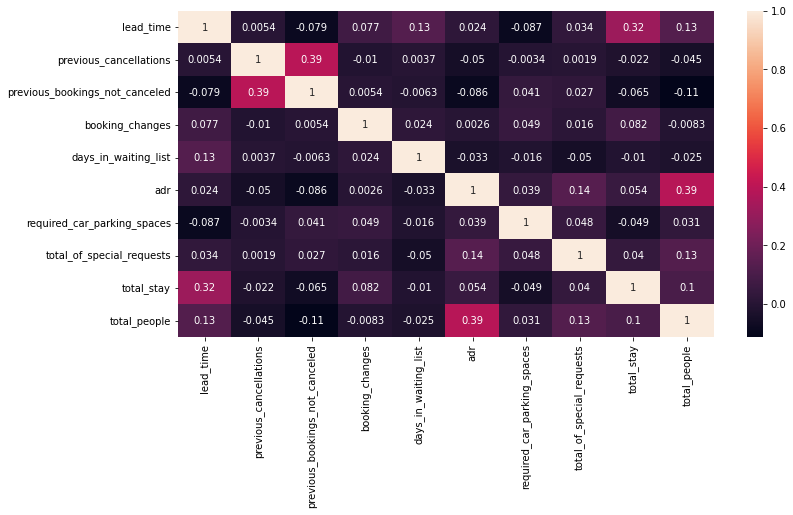

In [31]:
#correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation.corr(), annot=True)

**Plotting a box plot understnding the the outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

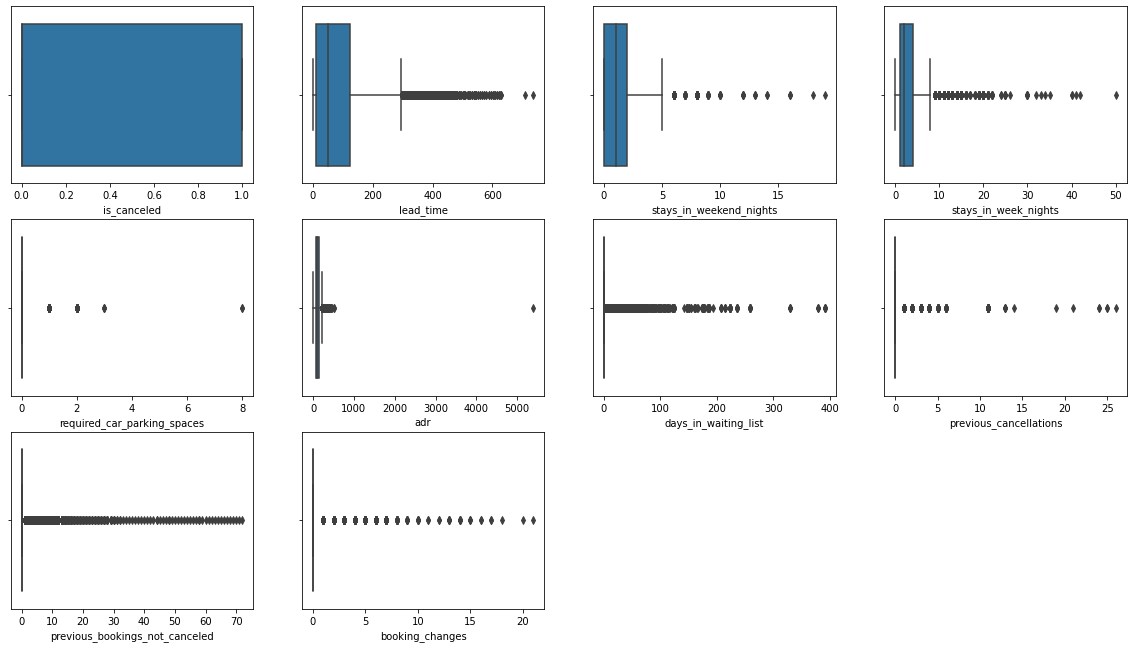

In [32]:
# defining a variable containing all the numerical columns
columns = ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces', 'adr','days_in_waiting_list', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1

# plotting box plot using matplotlib

plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df_hotel[column])

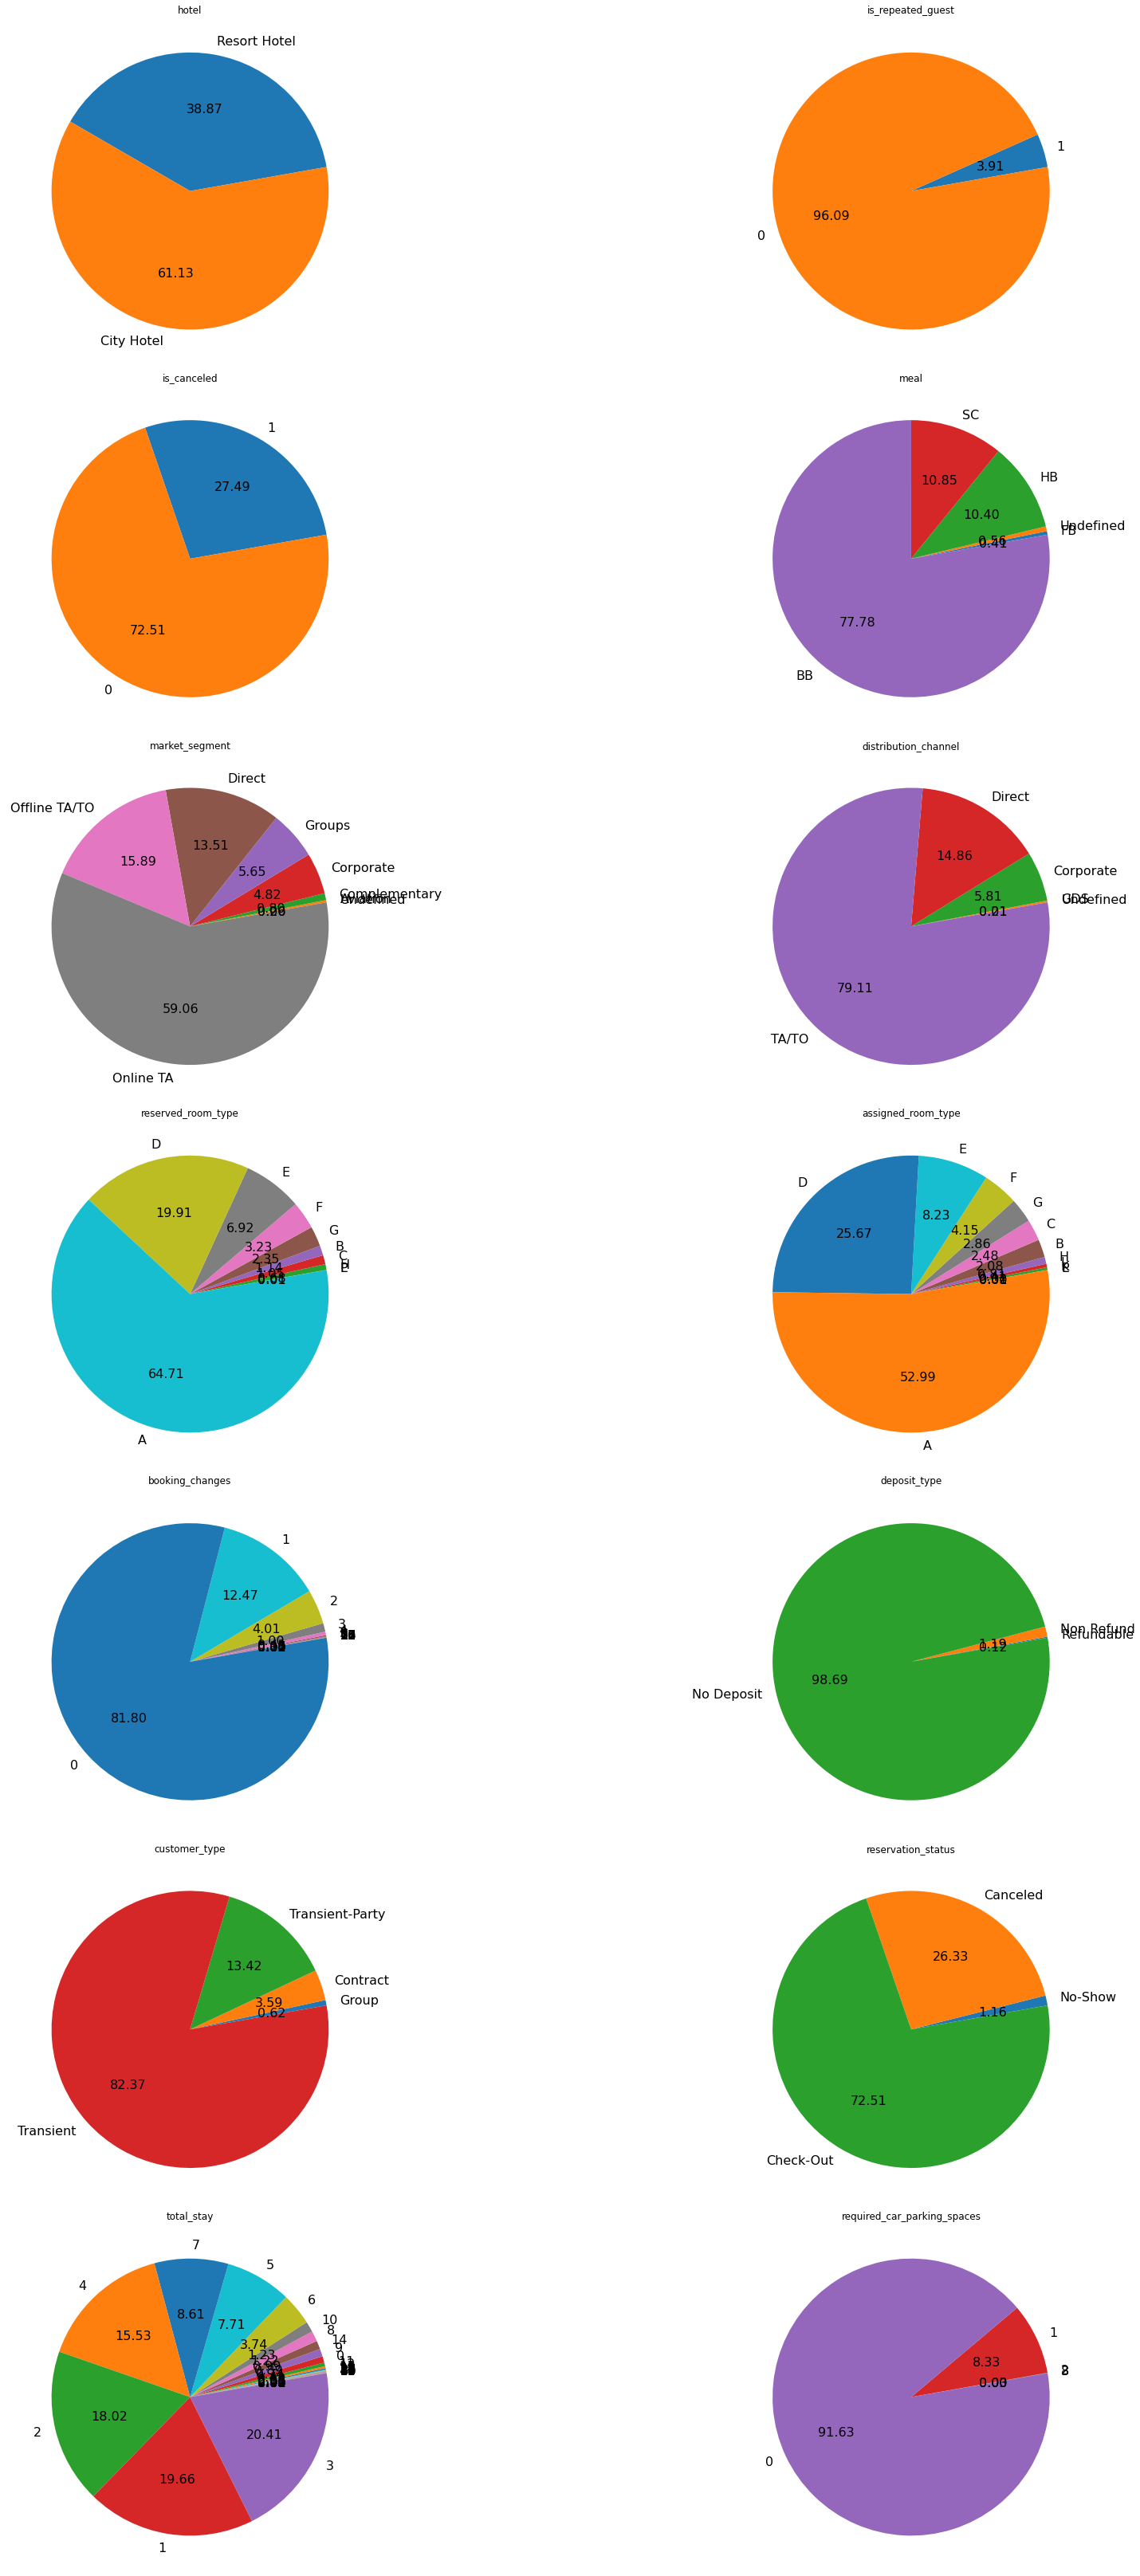

In [33]:
# defining the columns we want to analyse
columns = ['hotel', 'is_repeated_guest', 'is_canceled', 'meal', 'market_segment', 'distribution_channel','reserved_room_type', 
           'assigned_room_type','booking_changes', 'deposit_type', 'customer_type', 'reservation_status', 'total_stay', 'required_car_parking_spaces']


# creating plot of the data. Subplot is used when we want to build multiple charts side by side.
# (6,2) is the rows and columns grid of the chart we want to specify. If we keep it as (6,3) i.e. 6 rows and 3 columns will display chart.
#figsize is to adjust the size of the plot
fig, axes = plt.subplots(7, 2, figsize=(30, 45))

# defining a variable and using a loop to pull each index column of the list defined and plot its chart
axes = [ax for axes_row in axes for ax in axes_row]


for i, c in enumerate(df_hotel[columns]):
         df_hotel[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.2f', fontsize=16,startangle=10)
         axes[i].set_ylabel(' ')
    
plt.tight_layout()

**Scattter Plot**

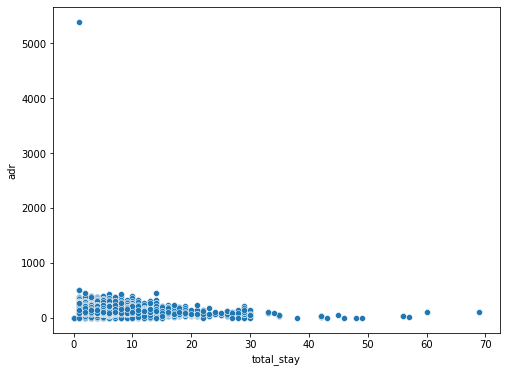

In [34]:
plt.figure(figsize = (8,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_hotel)
plt.show()

In [35]:
df_hotel.drop(df_hotel[df_hotel['adr'] > 5000].index, inplace = True)

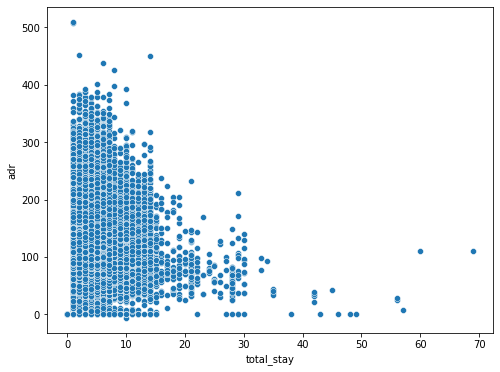

In [36]:
plt.figure(figsize = (8,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_hotel)
plt.show()

**Let's start with data analysis on Hotel Booking**

**1. Which market segment has the highest ADR?**

In [53]:
df_hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

There are a total of 8 different market segment, so let's see which one generates the most ADR.

Text(0.5, 1.0, 'Market segment ADR')

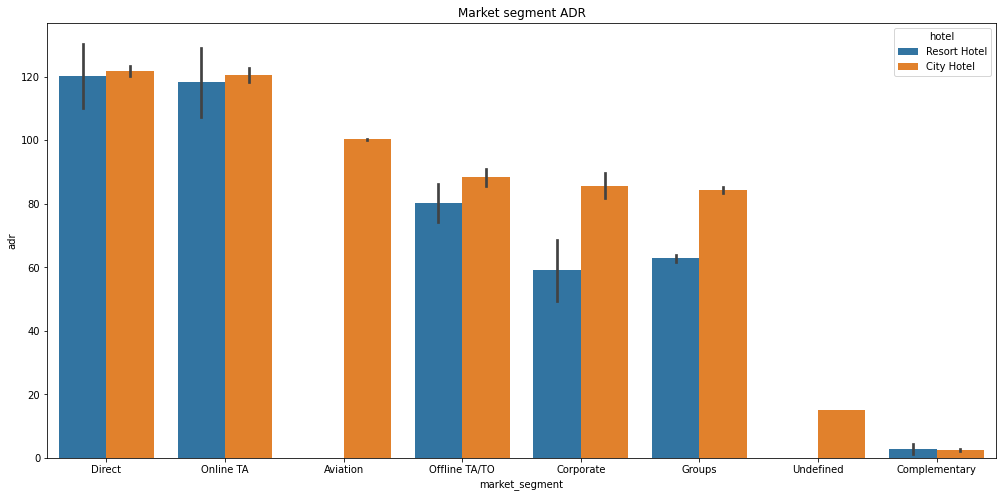

In [57]:
#finding the mean by grouping the "hotel," "is_canceled," and "market segment" 
group_by=df_hotel.groupby(['hotel','is_canceled','market_segment'])['adr'].mean().reset_index()  

#plotting barchart
plt.figure(figsize=(17,8))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=group_by.sort_values(by='adr',ascending=False))
plt.title('Market segment ADR')

Observaiton 

In both types of hotels, "Direct" and "Online TA" are making the most contributions.

So the maximum focus should be on "direct" and "online TA" to maximise profit.


 **2.In which month do the hotels have the highest ADR?** 

In [62]:
# Lets group arrival_date_month and hotel
month_of_booking=df_hotel.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

# make a month list.
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# It will take the order of the month list in the dataframe along with values.
month_of_booking['arrival_date_month']=pd.Categorical(month_of_booking['arrival_date_month'],categories=month,ordered=True)

# Lets sort the arrival_date_month
month_of_booking=month_of_booking.sort_values('arrival_date_month')

month_of_booking

,arrival_date_month,hotel,adr
8,January,City Hotel,85.092612
9,January,Resort Hotel,49.131584
6,February,City Hotel,88.945304
7,February,Resort Hotel,54.081107
15,March,Resort Hotel,57.569213
14,March,City Hotel,93.670639
0,April,City Hotel,117.156250
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,127.851240


Text(0, 0.5, 'Average Daily Rate')

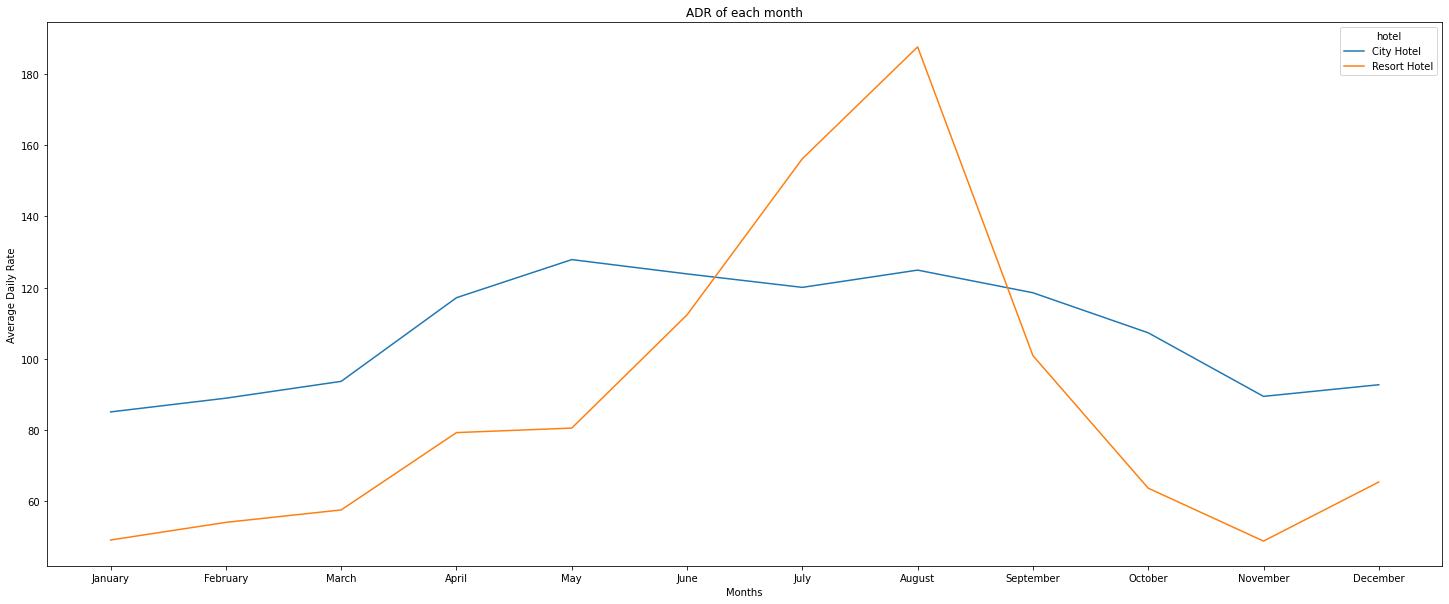

In [70]:
# Let's plot the arrival_date_month, adr, and hotel.
plt.figure(figsize=(25,10))
sns.lineplot(x=month_of_booking['arrival_date_month'],y=month_of_booking['adr'],hue=month_of_booking['hotel'])

# set lables
plt.title('ADR of each month')
plt.xlabel('Months')
plt.ylabel('Average Daily Rate')

**Observation**

In comparison to City Hotels, the ADR for Resrot Hotel is higher in the months of June, July, and August. Perhaps clients/people wish to vacation in resort hotels this summer.

January, February, March, April, October, November, and December are the ideal months for visitors to resort or city hotels because of the low average daily rate throughout these months.

## **3.Does a longer waiting period result in cancelled bookings??**

In [77]:
# make a data frame with days of waiting greater than 0 in it.
waiting_period = df_hotel[df_hotel['days_in_waiting_list']!=0]
waiting_period.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
104648,City Hotel,0,47,2017,January,3,16,1,2,1,...,0,15,Transient-Party,75.00,0,0,Check-Out,2017-01-19,3,1
8723,Resort Hotel,0,339,2016,October,42,11,2,5,2,...,0,150,Transient-Party,80.81,0,0,Check-Out,2016-10-18,7,2
51153,City Hotel,0,297,2016,May,20,14,1,1,2,...,0,236,Transient-Party,65.00,0,0,Check-Out,2016-05-16,2,2
45638,City Hotel,0,140,2015,November,47,18,0,3,1,...,0,87,Transient-Party,65.00,0,0,Check-Out,2015-11-21,3,1
44084,City Hotel,0,83,2015,September,40,30,0,1,1,...,0,77,Transient-Party,90.60,0,0,Check-Out,2015-10-01,1,1


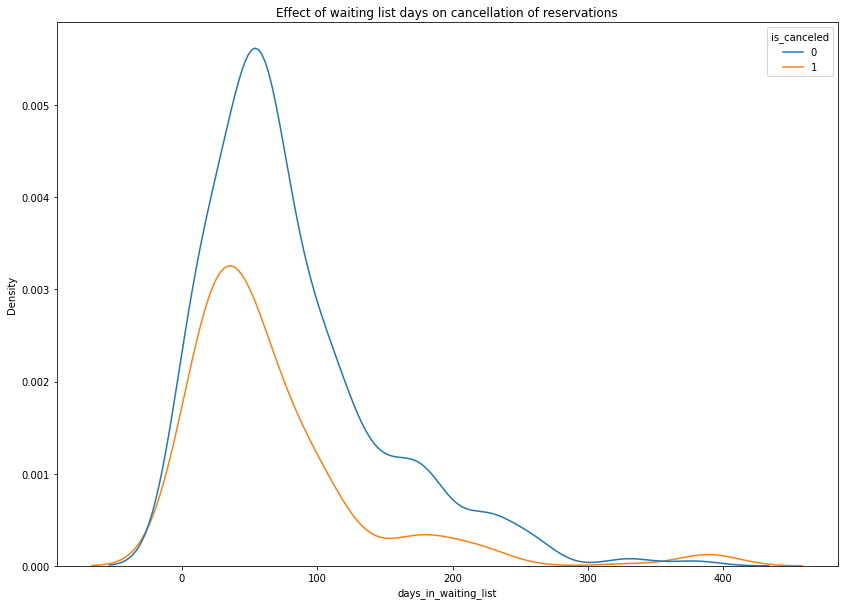

In [84]:
# illustrate the impact of waiting list days on cancellations of reservations

plt.figure(figsize=(14,10))
sns.kdeplot(x='days_in_waiting_list',hue='is_canceled',data=waiting_period)
plt.title('Effect of waiting list days on cancellation of reservations');


**Inference**

There is no direct correlation between a longer waiting period and booking cancellation, as can be seen from the fact that the majority of reservations that had less than 100 days on the waiting list were cancelled. However, reservations that had more than 100 days on the waiting list were also cancelled at a slightly higher rate.

**4. Which distribution route has given adr the most boost in terms of revenue?**

In [86]:
# group by distribution channel and hotel
dist_channel=df_hotel.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
dist_channel

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.265884
1,Corporate,Resort Hotel,52.972522
2,Direct,City Hotel,112.092246
3,Direct,Resort Hotel,106.523946
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.307653
6,TA/TO,Resort Hotel,101.553533
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


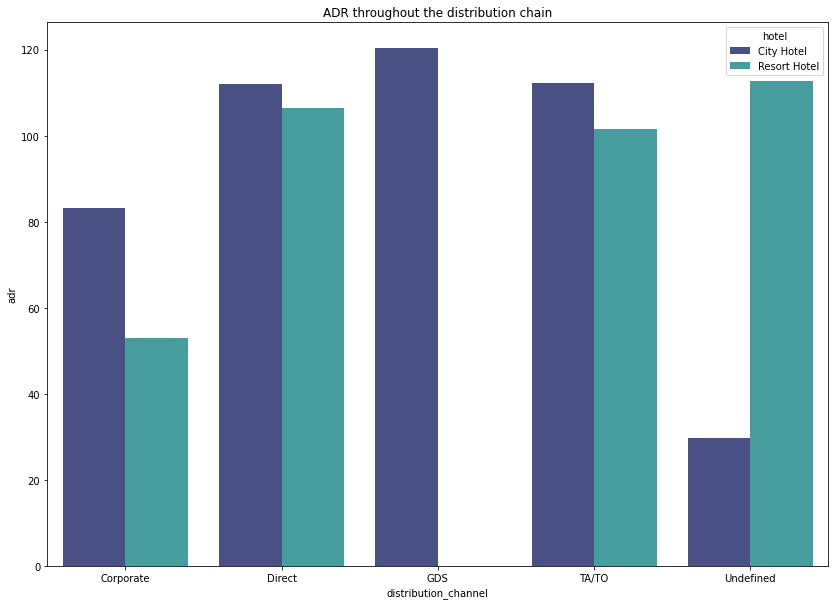

In [93]:
# Determine which revenue-producing distribution route you can identify.

plt.figure(figsize=(14,10))
sns.barplot(x='distribution_channel', y='adr', data=dist_channel, hue='hotel',palette='mako')
plt.title('ADR throughout the distribution chain');

Corporate - These are companies that help businesses make hotel reservations.

GDS-GDS - serves as a global link between travel agents and suppliers, including hotels and other lodging establishments. It enables automated transactions and provides real-time product, price, and availability data to travel agencies and internet booking engines.

Direct - refers to making reservations with the specific hotels directly.

TA/TO - Bookings are made through travel agents or travel operators.

Undefined – Reservations are not defined. Maybe customers made their reservations when they arrived.
# **Inference**




*   In both types of hotels, "Direct" and "TA/TO" have contributed to adr about equally.

*   GDS made a significant contribution to ads of the "City Hotel" type.


*  GDS contributing little to hotel reservations at resorts.





# **5. What is the booking rate according to the population?**

In [100]:
# make a dataframe that isn't cancelled.
not_cancelled = df_hotel[df_hotel['is_canceled']==0]
# establish three distinct dataframes for single, married, and family users.
single = not_cancelled[not_cancelled['total_people']==1]
couple = not_cancelled[not_cancelled['total_people']==2]
family_with_3_members = not_cancelled[not_cancelled['total_people']==3]
family_with_more_than_3 = not_cancelled[not_cancelled['total_people']>3]

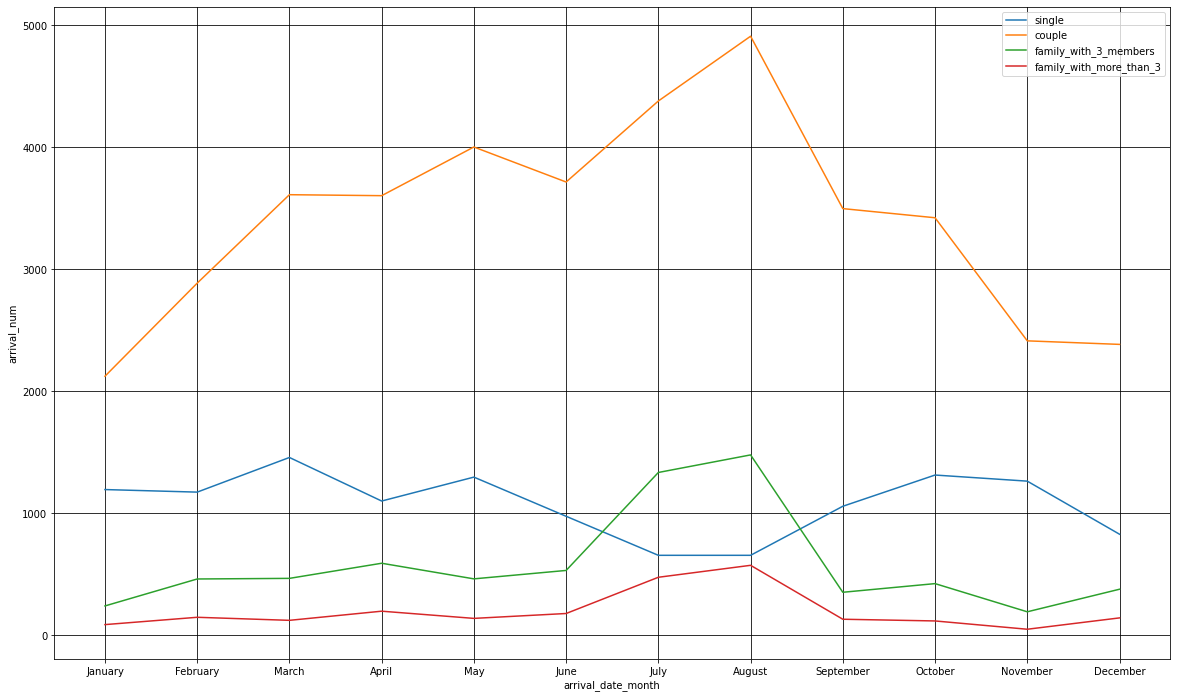

In [101]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(20,12))
for type in ['single', 'couple', 'family_with_3_members','family_with_more_than_3']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type)
  plt.grid( b=True,color='black');

## **Inference**



*   Although it appears that couples made the majority of reservations, we cannot be certain that they are a couple because the data contains no information specifically about couples or families.
*   Additionally, as was evident from earlier analysis, the month of August saw the greatest number of reservations.

*   Bookings for hotels increased in the months of June, July, and August.
*   Bookings for families with four or more members are the least expensive.






